### Cell 1: Setup and Imports

In [13]:
import pandas as pd
import numpy as np
import os
import sys
import joblib 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

# Add src to path to import your custom utilities
sys.path.append(os.path.abspath('../'))

# Import your professional evaluation functions
from src.modeling_utils import evaluate_model, perform_cross_validation

print("Setup Complete.")

Setup Complete.


### Cell 2: Load and Model E-commerce Data
This section handles the fraud detection for the e-commerce dataset.


--- Running 5-Fold Cross-Validation for E-commerce: Logistic Regression ---
Mean Recall: 0.2513 (+/- 0.0103)
Mean F1-Score: 0.3372 (+/- 0.0099)
Mean ROC-AUC: 0.5167 (+/- 0.0024)

--- Running 5-Fold Cross-Validation for E-commerce: XGBoost ---
Mean Recall: 0.8766 (+/- 0.0010)
Mean F1-Score: 0.9273 (+/- 0.0007)
Mean ROC-AUC: 0.9707 (+/- 0.0011)

--- E-commerce: XGBoost Final Test Evaluation ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     27393
           1       0.81      0.57      0.67      2830

    accuracy                           0.95     30223
   macro avg       0.88      0.78      0.82     30223
weighted avg       0.94      0.95      0.94     30223



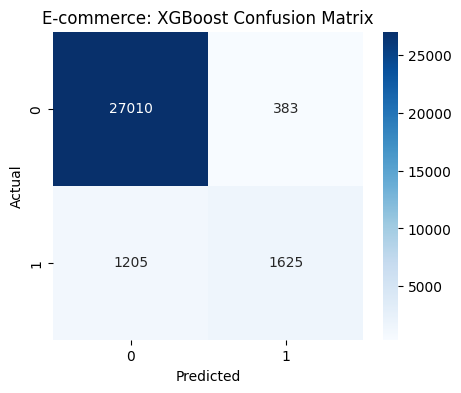

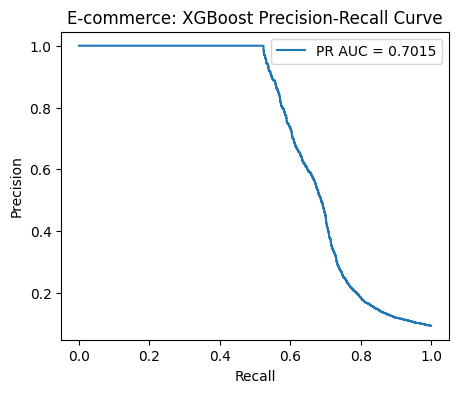

E-commerce XGBoost saved with PR-AUC: 0.7015


In [14]:
# 1. Load E-commerce processed data
X_train = pd.read_csv('../data/processed/X_train_final.csv')
y_train = pd.read_csv('../data/processed/y_train_final.csv').values.ravel()
X_test = pd.read_csv('../data/processed/X_test_final.csv')
y_test = pd.read_csv('../data/processed/y_test_final.csv').values.ravel()

# 2. Initialize Models
lr_model = LogisticRegression(max_iter=1000, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# 3. Cross-Validation (The scientific check)
perform_cross_validation(lr_model, X_train, y_train, "E-commerce: Logistic Regression")
perform_cross_validation(xgb_model, X_train, y_train, "E-commerce: XGBoost")

# 4. Final Training and Evaluation
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Visual plots (Confusion Matrix & PR Curve)
xgb_pr_auc = evaluate_model(y_test, y_pred_xgb, y_prob_xgb, "E-commerce: XGBoost")

# 5. Save Model
joblib.dump(xgb_model, '../models/best_fraud_model.pkl')
print(f"E-commerce XGBoost saved with PR-AUC: {xgb_pr_auc:.4f}")

### Cell 3: Load and Model Credit Card (Bank) Data
This section repeats the process for the bank dataset to fulfill the project requirements.


--- Running 5-Fold Cross-Validation for Bank: Logistic Regression ---
Mean Recall: 0.9210 (+/- 0.0013)
Mean F1-Score: 0.9464 (+/- 0.0011)
Mean ROC-AUC: 0.9909 (+/- 0.0002)

--- Running 5-Fold Cross-Validation for Bank: XGBoost ---
Mean Recall: 0.9980 (+/- 0.0004)
Mean F1-Score: 0.9970 (+/- 0.0003)
Mean ROC-AUC: 0.9999 (+/- 0.0000)

--- Bank: XGBoost Final Test Evaluation ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.26      0.83      0.40        95

    accuracy                           1.00     56746
   macro avg       0.63      0.91      0.70     56746
weighted avg       1.00      1.00      1.00     56746



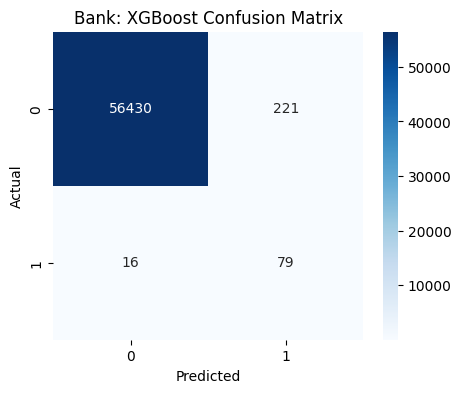

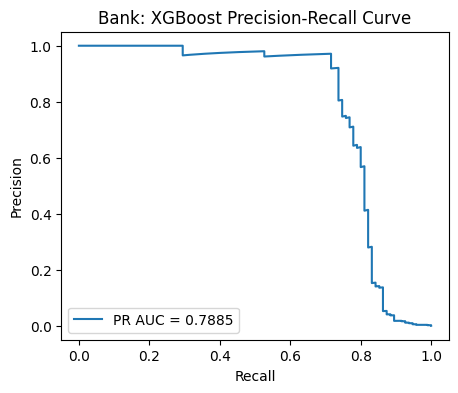

Bank XGBoost saved with PR-AUC: 0.7885


In [15]:
# 1. Load Bank processed data
X_train_bank = pd.read_csv('../data/processed/X_train_creditcard.csv')
y_train_bank = pd.read_csv('../data/processed/y_train_creditcard.csv').values.ravel()
X_test_bank = pd.read_csv('../data/processed/X_test_creditcard.csv')
y_test_bank = pd.read_csv('../data/processed/y_test_creditcard.csv').values.ravel()

# 2. Initialize Models for Bank Data
lr_bank = LogisticRegression(max_iter=1000, random_state=42)
xgb_bank = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# 3. Cross-Validation (Bank)
perform_cross_validation(lr_bank, X_train_bank, y_train_bank, "Bank: Logistic Regression")
perform_cross_validation(xgb_bank, X_train_bank, y_train_bank, "Bank: XGBoost")

# 4. Final Training and Evaluation (Bank)
xgb_bank.fit(X_train_bank, y_train_bank)
y_pred_bank = xgb_bank.predict(X_test_bank)
y_prob_bank = xgb_bank.predict_proba(X_test_bank)[:, 1]

# Save result to variable and show plots
bank_pr_auc = evaluate_model(y_test_bank, y_pred_bank, y_prob_bank, "Bank: XGBoost")

# 5. Save Model
joblib.dump(xgb_bank, '../models/best_bank_fraud_model.pkl')
print(f"Bank XGBoost saved with PR-AUC: {bank_pr_auc:.4f}")

### Cell 4: Final Comparison and Results Summary
This final cell creates the summary table you need for your report.

In [16]:
# Create a summary comparison dataframe
summary_data = {
    "Dataset": ["E-commerce", "Credit Card (Bank)"],
    "Best Model": ["XGBoost", "XGBoost"],
    "PR-AUC Score": [xgb_pr_auc, bank_pr_auc]
}
summary_df = pd.DataFrame(summary_data)

print("\n" + "="*40)
print("   FINAL PROJECT SUMMARY: TASK 2")
print("="*40)
print(summary_df)


   FINAL PROJECT SUMMARY: TASK 2
              Dataset Best Model  PR-AUC Score
0          E-commerce    XGBoost      0.701526
1  Credit Card (Bank)    XGBoost      0.788514
